<br>
<br>

# Import modules

In [1]:
import pandas as pd #data manipulation
import numpy as np #linear algebra
import os #operating system

import statsmodels.api as sm #logistic regression

from sklearn.experimental import enable_iterative_imputer #multivariate imputation
from sklearn.ensemble import RandomForestRegressor #regressor for imputation
from sklearn.impute import IterativeImputer #multivariate imputation
from sklearn.model_selection import train_test_split #split train and test
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import accuracy_score #accuracy metric

from matplotlib import pyplot as plt #plots

<br>
<br>

# Open dataset

In [2]:
#open and display dataset
path = os.getcwd()
data = pd.read_csv(f"{path}/gono.csv")
data = data.drop("ID", axis=1)
print("Dataset shape:",data.shape)
data.head()

Dataset shape: (3144, 11)


,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,NB_MTS,RAISON,NB_PART,HISTOIRE,CULTURE,DIAGN
0,1,1,29,1,2,8,3,5.0,0.0,0.0,0.0
1,1,1,18,1,1,0,2,1.0,1.0,1.0,1.0
2,1,1,24,1,2,1,1,2.0,0.0,0.0,0.0
3,1,1,29,1,2,3,1,6.0,0.0,1.0,1.0
4,1,3,28,1,2,3,1,2.0,0.0,0.0,0.0


In [64]:
#compute proportion of observations sicked
values = data["DIAGN"].value_counts()
prop = values[1] / (values[0]+values[1])
print(f"Proportion of sickness: {round(prop*100,2)}%")

Proportion of sickness: 24.94%


<br>
<br>

# Replace 9 and 99 by np.nan

In [4]:
# replace value 9 and 99 by NaN
liste = ["ID", "AGE", "NB_PART"]
for var in data.columns:
    if var not in liste:
        data[var] = data[var].replace(9,np.nan)
    else:
        data[var] = data[var].replace(99,np.nan)
print(f"Total numbers of nan: {data.isna().sum().sum()}")

Total numbers of nan: 601


In [5]:
liste = ["AGE", "NB_PART", "NB_MTS"]
for var in data.columns:
    if var not in liste:
        data[var] = data[var].astype('category')
data.dtypes

SEXE          category
ETAT_C        category
AGE            float64
ORIENT_SEX    category
MTS_ANT       category
NB_MTS         float64
RAISON        category
NB_PART        float64
HISTOIRE      category
CULTURE       category
DIAGN         category
dtype: object

<br>
<br>

# Statistical analysis

In [6]:
#descriptive statistics for quantitative variables
data.describe()

,AGE,NB_MTS,NB_PART
count,3138.000000,3131.000000,3078.000000
mean,28.448693,1.177579,3.226446
std,7.828457,2.519145,6.373062
min,14.000000,0.000000,0.000000
25%,23.000000,0.000000,1.000000
50%,27.000000,1.000000,2.000000
75%,32.000000,1.000000,3.000000
max,78.000000,65.000000,98.000000


In [7]:
print(data.CULTURE.value_counts()/len(data)*100)
data = data.drop("CULTURE", axis=1).copy()

0.0    73.314249
1.0    22.868957
2.0     0.477099
3.0     0.381679
5.0     0.318066
4.0     0.286260
7.0     0.031807
Name: CULTURE, dtype: float64


### La plupart des cultures se situent dans la gorge. Pour la suite de l'analyse, on décide de supprimer la variable Culture étant donné que cette dernière est un prédicteur parfait de la variable dépendante sur le diagnostique.

<br>

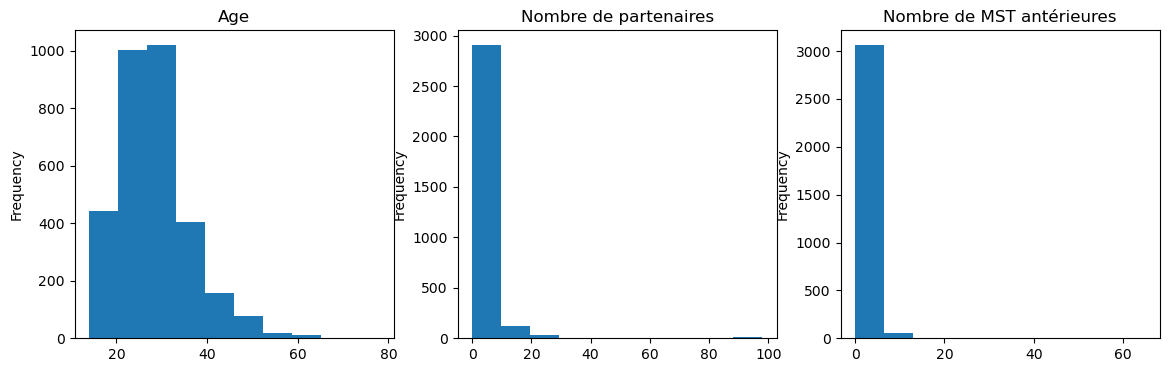

In [8]:
#define plot configuration
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))

#age distribution
data['AGE'].plot.hist(ax=ax[0])
ax[0].set_title('Age')

#number of partners distribution
data['NB_PART'].plot.hist(ax=ax[1])
ax[1].set_title('Nombre de partenaires')

#MTS distribution
data['NB_MTS'].plot.hist(ax=ax[2])
ax[2].set_title('Nombre de MST antérieures')

#display plot
plt.show()

In [9]:
#outlier analysis
variable = "NB_PART"
value = max(data[variable])
data.loc[data[variable] > 90]

,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,NB_MTS,RAISON,NB_PART,HISTOIRE,DIAGN
172,1,1.0,26.0,1.0,2,1.0,3.0,98.0,0.0,1.0
669,2,3.0,27.0,NaN,2,2.0,1.0,98.0,0.0,1.0
1237,1,1.0,28.0,NaN,2,1.0,1.0,98.0,0.0,1.0
2078,1,1.0,28.0,1.0,2,1.0,3.0,98.0,0.0,1.0
2875,1,1.0,21.0,NaN,1,0.0,3.0,98.0,0.0,NaN


In [10]:
#remove outliers
#data = data[data["NB_PART"] < ]
#data.loc[data[variable] == value]

<br>
<br>

# Imputation NA

In [11]:
print(f"Total numbers of nan (before imputation): {data.isna().sum().sum()}")

#define a multivariate imputer 
imp = IterativeImputer(estimator=RandomForestRegressor())

#imputation 
data_to_imput = data.copy()
imp.fit(data_to_imput)
data_imputed = pd.DataFrame(imp.transform(data_to_imput), columns = data_to_imput.columns)
data_imputed = round(data_imputed) #round because the imputer uses a regressor

#display new dataset
print(f"\nTotal numbers of nan (after imputation): {data_imputed.isna().sum().sum()}")
data_imputed.head()

Total numbers of nan (before imputation): 528


/Users/josephbarbier/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



Total numbers of nan (after imputation): 0


,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,NB_MTS,RAISON,NB_PART,HISTOIRE,DIAGN
0,1.0,1.0,29.0,1.0,2.0,8.0,3.0,5.0,0.0,0.0
1,1.0,1.0,18.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0
2,1.0,1.0,24.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0
3,1.0,1.0,29.0,1.0,2.0,3.0,1.0,6.0,0.0,1.0
4,1.0,3.0,28.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0


<br>
<br>

# Get dummies

In [12]:
#variable that we wan to transform in dummies
var_to_dummies = ["SEXE", "ETAT_C", "MTS_ANT", "RAISON", "ORIENT_SEX"]
final_data = data_imputed.copy()

#add the new variable-matrix and remove the older ones
for var in var_to_dummies:
    to_add = pd.get_dummies(final_data[var], drop_first=True, prefix=var)
    final_data = final_data.drop(var, axis=1)
    final_data = pd.concat([final_data, to_add], axis=1)
final_data

,AGE,NB_MTS,NB_PART,HISTOIRE,DIAGN,SEXE_2.0,ETAT_C_2.0,ETAT_C_3.0,ETAT_C_4.0,MTS_ANT_2.0,RAISON_2.0,RAISON_3.0,RAISON_4.0,RAISON_5.0,ORIENT_SEX_2.0
0,29.0,8.0,5.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0
1,18.0,0.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,0
2,24.0,1.0,2.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0
3,29.0,3.0,6.0,0.0,1.0,0,0,0,0,1,0,0,0,0,0
4,28.0,3.0,2.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,25.0,0.0,4.0,1.0,0.0,0,0,1,0,0,1,0,0,0,1
3140,20.0,0.0,3.0,1.0,0.0,1,0,0,0,0,1,0,0,0,1
3141,30.0,2.0,1.0,0.0,0.0,0,0,1,0,1,0,0,0,0,1
3142,36.0,0.0,1.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0


<br>
<br>

# Test de significativité des variables ( student ) 

In [13]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

def compare_groups(data, var_col, group_col="DIAGN"):
    
    #subset sick and not-sick
    group0 = data[data[group_col] == 0][var_col]
    group1 = data[data[group_col] == 1][var_col]
    
    #compute p-value
    stat, p = ttest_ind(group0, group1)
    
    print(f"\nComparaison (test de student) des moyennes d'{var_col} chez les malades et non-malades :\n statistique = {round(stat,3)}\n p-value = {round(p,5)}")

In [14]:
compare_groups(final_data,"AGE")
compare_groups(final_data,"NB_PART")
compare_groups(final_data,"NB_MTS")


Comparaison (test de student) des moyennes d'AGE chez les malades et non-malades :
 statistique = 2.9
 p-value = 0.00376

Comparaison (test de student) des moyennes d'NB_PART chez les malades et non-malades :
 statistique = -7.548
 p-value = 0.0

Comparaison (test de student) des moyennes d'NB_MTS chez les malades et non-malades :
 statistique = -3.026
 p-value = 0.0025


<br>

### On compare les moyennes entre les groupes malade et non malade pour chaque variable quantitative. On remarque que pour chacunes d'elles la différence est significative au seuil de risque de 5%. Dit autrement:

- les jeunes sont significativement plus touchés par la gonorrhée que les plus âgés
- le risque de maladie augmente avec le nombre de partenaire ainsi que le nombre de MST antérieures (statistique de test négative pour ces 2 variables)

<br>
<br>

# Split

In [15]:
#split the dataset into a train and a test set
X = final_data.drop(["DIAGN"], axis=1)
X = X.assign(Intercept=1)
y = final_data["DIAGN"]

#20% for the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<br>
<br>

# Model with all variables

In [16]:
#logistic regression
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()

#results of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  DIAGN   No. Observations:                 2515
Model:                            GLM   Df Residuals:                     2501
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1325.7
Date:                Mon, 06 Mar 2023   Deviance:                       2651.5
Time:                        17:56:53   Pearson chi2:                 2.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05826
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
AGE               -0.0304      0.007     -4.173      0.000      -0.045      -0.016
NB_MTS             0.0282      0.019      1.521      0.128      -0.008       0.065
NB_PART            0.0344      0.009      3.625      0.000       0.016       0.053
HISTOIRE           0.1265      0.066      1.907      0.056      -0.003       0.256
SEXE_2.0          -0.3546      0.161     -2.202      0.028      -0.670      -0.039
ETAT_C_2.0         0.0302      0.230      0.131      0.895      -0.420       0.481
ETAT_C_3.0         0.4136      0.249      1.658      0.097      -0.075       0.902
ETAT_C_4.0         0.9044      1.120      0.807      0.419      -1.291       3.100
MTS_ANT_2.0       -0.1228      0.108     -1.136      0.256      -0.335       0.089
RAISON_2.0         0.1265      0.066      1.907      0.056      -0.003       0.256
RAISON_3.0         0.0639      0.111      0.577      0.564      -0.153       0.281
RAISON_4.0        -0.1273      0.372     -0.342      0.732      -0.857       0.602
RAISON_5.0        -1.1317      0.639     -1.772      0.076      -2.384       0.120
ORIENT_SEX_2.0    -0.8362      0.129     -6.464      0.000      -1.090      -0.583
Intercept         -0.0460      0.222     -0.207      0.836      -0.481       0.389
==================================================================================
"""

<br>
<br>

# Performance evaluation

In [17]:
#define predictions for the test set
y_pred = round(results.predict(X_test))

#logistic regression
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Logistic regression: {round(acc*100,2)}%")

#AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
print("AUC: %.2f%%" % (auc*100))

#Cohen score
from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score: %.2f%%" % (cohen))

Accuracy Logistic regression: 75.2%
AUC: 51.87%
Cohen kappa score: 0.05%


/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_22639/2091273371.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_22639/2091273371.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


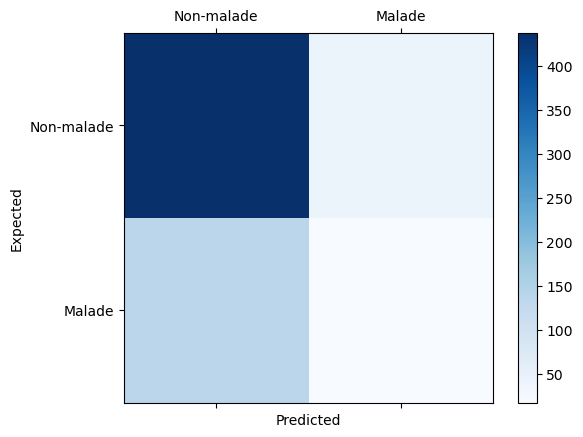

In [65]:
%matplotlib inline
conf_mat = confusion_matrix(y_test, y_pred)
labels = ['Non-malade', 'Malade']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### Matrice de confusion
Le modèle semble prédire essentiellement non-malade. On peut expliquer cela par le fait que la proportion de non-malade est naturellement élevée dans le jeu de données initial.

<br>
<br>

# Backward stepwise regression

In [25]:
#logistic regression
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()

#stepwise algorithm
while results.pvalues.max() > 0.10:
    max_pvalue_index = results.pvalues.idxmax()
    X_train = X_train.drop(max_pvalue_index, axis=1)
    logit_model = sm.Logit(y_train, X_train)
    results = logit_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  DIAGN   No. Observations:                 2515
Model:                            GLM   Df Residuals:                     2508
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1327.7
Date:                Mon, 06 Mar 2023   Deviance:                       2655.5
Time:                        17:57:07   Pearson chi2:                 2.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05677
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
AGE               -0.0318      0.002    -13.108      0.000      -0.037      -0.027
NB_PART            0.0345      0.009      3.718      0.000       0.016       0.053
HISTOIRE           0.1142      0.061      1.864      0.062      -0.006       0.234
SEXE_2.0          -0.3434      0.160     -2.149      0.032      -0.657      -0.030
ETAT_C_3.0         0.4194      0.240      1.751      0.080      -0.050       0.889
RAISON_2.0         0.1142      0.061      1.864      0.062      -0.006       0.234
RAISON_5.0        -1.0542      0.621     -1.696      0.090      -2.272       0.164
ORIENT_SEX_2.0    -0.8538      0.120     -7.108      0.000      -1.089      -0.618
==================================================================================
"""

#### On retrouve des conclusions similaires :

- plus l'âge est élevé, moins l'individu est à risque pour la gonorrhée
- plus le nombre de partenaire dans le mois précédent est élevé, plus l'individu est à risque

#### On remarque également que :
- le fait d'être une femme a un impact négatif significatif sur la probabilité d'être touché par la gonorrhée
- le fait d'être hétérosexuel a un impact négatif significatif sur l'incidence de la gonorrhée
- le fait d'avoir eu une relation sexuelle avec quelqu'un contaminé augmente significativement le risque

#### Limitations :
Malgré la présence de variables explicatives significatives, on doit cependant souligner que le modèle au global n'est pas particulièrement performant (AUC $\approx 50$%) et prédit mal la vraie valeur d'individus sur lesquels il n'a pas été entraîné (accuracy sur le test set proche de la proportion de non-malade : ne prédit pas mieux que prédire que non-malade).

<br>
<br>

# Non-linear models

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<br>

### Random forest classifier

In [61]:
#fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier

#hyper-parameters optimization
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [62]:
#test performance
model = RandomForestClassifier(max_depth= None,
                               max_features= 'log2',
                               min_samples_leaf= 4,
                               min_samples_split= 5,
                               n_estimators= 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Random Forest: {round(acc*100,2)}%")

#AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
print("AUC: %.2f%%" % (auc*100))

#Cohen score
from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test,y_pred)
print("Cohen kappa score: %.2f%%" % (cohen))

Accuracy Random Forest: 75.2%
AUC: 50.79%
Cohen kappa score: 0.02%


<br>

### Kneighbors classifier

In [63]:
#fit a Kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier

#test different number of neighbors
for i in range(1,10):

    #model
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    
    #test performance
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Kneighbors classifier: {round(acc*100,2)}% (with {i} neighbors)")
    
    #AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test,y_pred)
    print("AUC: %.2f%%" % (auc*100))
    
    #Cohen score
    from sklearn.metrics import cohen_kappa_score
    cohen = cohen_kappa_score(y_test,y_pred)
    print("Cohen kappa score: %.2f%%" % (cohen), "\n")

Accuracy Kneighbors classifier: 65.5% (with 1 neighbors)
AUC: 54.81%
Cohen kappa score: 0.09% 

Accuracy Kneighbors classifier: 73.45% (with 2 neighbors)
AUC: 53.63%
Cohen kappa score: 0.09% 

Accuracy Kneighbors classifier: 69.63% (with 3 neighbors)
AUC: 54.44%
Cohen kappa score: 0.10% 

Accuracy Kneighbors classifier: 73.29% (with 4 neighbors)
AUC: 52.86%
Cohen kappa score: 0.07% 

Accuracy Kneighbors classifier: 70.43% (with 5 neighbors)
AUC: 53.41%
Cohen kappa score: 0.08% 

Accuracy Kneighbors classifier: 73.13% (with 6 neighbors)
AUC: 52.09%
Cohen kappa score: 0.05% 

Accuracy Kneighbors classifier: 72.18% (with 7 neighbors)
AUC: 52.35%
Cohen kappa score: 0.06% 

Accuracy Kneighbors classifier: 73.45% (with 8 neighbors)
AUC: 50.53%
Cohen kappa score: 0.01% 

Accuracy Kneighbors classifier: 72.18% (with 9 neighbors)
AUC: 51.46%
Cohen kappa score: 0.04% 

